<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_DEEP/blob/main/Neural_Network_from_scratch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#All function

In [2]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))



def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)


def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)

    return z1,a1,z2,y_hat


def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy

def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J




def dot_product_breakdown(matrix_a, matrix_b):
    # Check if matrices are compatible for dot product
    if matrix_a.shape[1] != matrix_b.shape[0]:
        print("Error: Incompatible matrices for dot product.")
        return

    # Calculate the dot product
    result = np.dot(matrix_a, matrix_b)

    # Print the detailed breakdown in the console
    print("Detailed Breakdown of Dot Product:")
    print("===================================")
    print(" Element   |   Calculation                    |   Result")
    print("------------|----------------------------------|------------------")

    # Iterate through each element in the resulting matrix
    for k in range(result.shape[1]):
      for i in range(result.shape[0]):
          calculation = " + ".join([f"({matrix_a[i, j]} * {matrix_b[j, k]})" for j in range(matrix_a.shape[1])])
          print(f" Result[{i + 1},1] |   {calculation}   |   {result[i, k]}")

    print("===================================")

# Requirements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Design

Putting all the concepts we have learned so far, we will see how to build a neural network
from scratch. We will learn how the neural network learns to perform the XOR gate
operation. The XOR gate returns 1 only when exactly only one of its inputs is 1 else it returns 0 as shown in
the following figure:

![image](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter01/images/1.png?raw=1)


To perform the XOR gate operation, we build a simple two-layer neural network as shown
in the following figure. As you can observe, we have an input layer with two nodes, a
hidden layer with five nodes and an output layers which consist of 1 node:


![image](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter01/images/2.png?raw=1)


#Define dataset

In [3]:
#x = np.array([ [0], [1], [1],[0]])


x = np.array([ [0,1], [1,0], [1,1],[0,0]])
y = np.array([ [1], [1], [0], [0]])

#Define the number of nodes in each layer:

In [4]:
num_input_nuron = x.shape[1]
num_hidden_neuron = 5
num_output_neuron = 1

#Initialize weights and bias randomly. First, we initialize, input to hidden layer weights:

In [5]:
Wxh = np.random.randn(num_input_nuron,num_hidden_neuron)
bh = np.zeros((1,num_hidden_neuron))

In [6]:
Wxh,bh

(array([[ 0.11504582,  0.21389847, -1.10702661, -0.58049586,  0.29216823],
        [ 0.22818819,  0.40889456, -0.14985501, -0.65731402,  1.56974901]]),
 array([[0., 0., 0., 0., 0.]]))

#Now initialize, hidden to output layer weights:

In [7]:
Why = np.random.randn (num_input_nuron,num_hidden_neuron)
by = np.zeros((1,num_output_neuron))

In [8]:
Why, by

(array([[ 0.3969645 ],
        [ 0.9729442 ],
        [ 0.07122377],
        [ 1.51936219],
        [-0.56504529]]),
 array([[0.]]))

#Set the learning rate and number of training iterations:

In [9]:
alpha = 0.01
num_iterations = 5000

#Now let's start training the network:

In [10]:
%%capture
cost = []
for i in range(num_iterations):

    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
    print("Iteration: ", i,"----------------------------------------------------------------------------------------------------------")

    print("#perform forward propagation and predict output: ")
    print("z1 = ",z1)
    print("a1 = ",a1)
    print("z2 = ",z2)
    print("y_hat = ",y_hat)

    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
    print("#perform backward propagation and calculate gradients: ")
    print("dJ_dWxh = ",dJ_dWxh)
    print("dJ_dWhy = ",dJ_dWhy)


    #update the weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy

    print("#update the weights: ")
    print("Wxh = ",Wxh)
    print("Why = ",Why)

    #compute cost
    c = cost_function(y, y_hat)
    print("#compute cost: ")
    print("cost = ",c)

    #store the cost
    cost.append(c)

Text(0, 0.5, 'Cost')

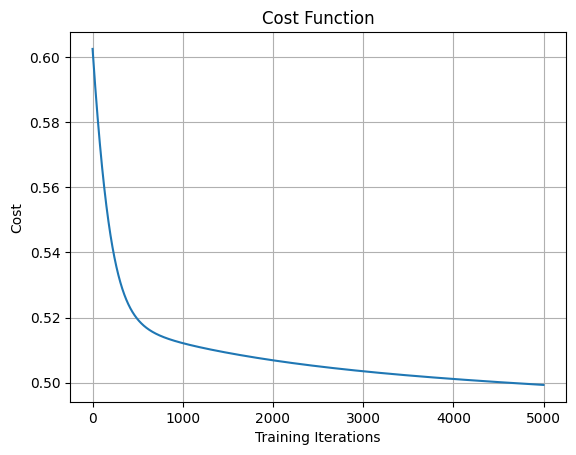

In [11]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

#details

In [3]:
x = np.array([ [0,1], [1,0], [1,1],[0,0]])
y = np.array([ [1], [1], [0], [0]])


num_input_neuron = x.shape[1]
num_hidden_neuron = 5
num_output_neuron = 1

In [4]:
Wxh = np.random.randn(num_input_neuron,num_hidden_neuron)
bh = np.zeros((1,num_hidden_neuron))

In [5]:
Why = np.random.randn (num_hidden_neuron,num_output_neuron)
by = np.zeros((1,num_output_neuron))

In [6]:
z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)

In [8]:
x,Wxh,Why

(array([[0, 1],
        [1, 0],
        [1, 1],
        [0, 0]]),
 array([[-0.47954065,  0.20615306,  1.23495644,  0.46804693, -0.49312533],
        [ 0.5611691 , -0.03092361, -1.99684944,  0.62336978,  0.73940902]]),
 array([[ 0.28341541],
        [-0.30764751],
        [-0.63190145],
        [ 1.29136923],
        [ 0.20140833]]))

In [9]:
 dot_product_breakdown(x, Wxh)

Detailed Breakdown of Dot Product:
 Element   |   Calculation                    |   Result
------------|----------------------------------|------------------
 Result[1,1] |   (0 * -0.4795406457863602) + (1 * 0.5611690971371517)   |   0.5611690971371517
 Result[2,1] |   (1 * -0.4795406457863602) + (0 * 0.5611690971371517)   |   -0.4795406457863602
 Result[3,1] |   (1 * -0.4795406457863602) + (1 * 0.5611690971371517)   |   0.0816284513507915
 Result[4,1] |   (0 * -0.4795406457863602) + (0 * 0.5611690971371517)   |   0.0
 Result[1,1] |   (0 * 0.20615305691793048) + (1 * -0.03092361364834478)   |   -0.03092361364834478
 Result[2,1] |   (1 * 0.20615305691793048) + (0 * -0.03092361364834478)   |   0.20615305691793048
 Result[3,1] |   (1 * 0.20615305691793048) + (1 * -0.03092361364834478)   |   0.1752294432695857
 Result[4,1] |   (0 * 0.20615305691793048) + (0 * -0.03092361364834478)   |   0.0
 Result[1,1] |   (0 * 1.2349564375341873) + (1 * -1.9968494355298494)   |   -1.9968494355298494
 Re